**Analyse der Herausforderungen und Visionen**<br>
Sjoberg et al. stellen in ihrer Arbeit "The Future of Empirical Methods in Software Engineering Research" Herausforderungen der empirischen Forschung dar. Für jede diese Herausforderungen wurde zum einen der aktuelle Stand der Praxis beschrieben und zum anderen Visionen dargestellt, wie sie sich diesen Stand in der Zukunft (2020-2025) vorstellen. Aus diesen Herausforderungen und Visionen wurden Fragen abgeleitet. Einige von diesen Fragen sollen mit der aktuellen entwickelten Semantischen Struktur und den damit gesammelten Daten beantwortet werden. 

Aktuell wenige empirische Methoden, für das Ziel 2020-2025 sollen mehr empirische Methoden verwendet werden. Aus dieser Aussage wurden zwei Fragen abgeleitet:<br>
**1. Welche empirischen Methoden verwenden Forscher im Bereich des RE?** <br> 
**2. Wie hat sich die Nutzung dieser Methoden in den letzten Jahren geändert?**<br>

Sjoberg et al sagen, dass es wenig Fähigkeit bei der Durchführung von Umfragen, Aktionsforschung und Fallstudien gibt. Folgende Fragen haben sich aus dieser Vision ergeben:<br>
**3. Wie hoch ist der Anteil bei der Verwendung von Umfragen, Fallstudien und Action Research im RE?**<br>
**4. Wie hat sich die Nutzung dieser drei Methoden(Umfrage, Fallstudie, Aktionsforschung) in den vergangenen Jahren entwickelt?**<br>

**7. Welche statistische Methoden werden in der Forschung im RE verwendet?**<br>
**6. Wie hat sich die Nutzung dieser Methoden in den letzten Jahren geändert?**<br>

**8. Werden die Rohdaten, Materialien und Ergebnisse, die in einer Studie verwendet und erzielt wurden, veröffentlicht?**<br>
**9. Welche Daten werden von Forscher veröffentlicht?**<br>

**10. Wird die Antwort auf eine Forschungsfrage explizit im Text gegeben oder ist diese im Text versteckt?**<br>

**11. Wie hoch ist der Anteil von systematischen Studien(SLR, mapping study...)?**<br>


**12. Verwenden Forschungen mehr als eine Forschungsmethode?**<br>
**13. Welche Forschungsmethoden werden Kombiniert?**<br>
**14. Welche Kombinationen aus data collection methods und analysis methods werden verwendet?**


In [185]:
import sparql_dataframe
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

endpoint_url = "https://orkg.org/triplestore"

PREFIX = """
        PREFIX orkgr: <http://orkg.org/orkg/resource/>
        PREFIX orkgc: <http://orkg.org/orkg/class/>
        PREFIX orkgp: <http://orkg.org/orkg/predicate/>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
        """

**Welche emprischen Forschungsmethoden verwenden Forscher im Bereich des RE?**

<AxesSubplot:ylabel='collection method'>

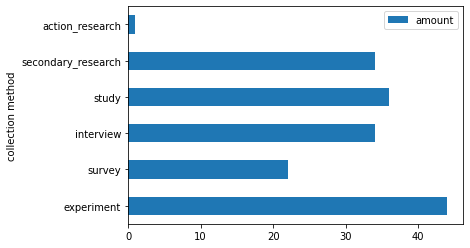

In [223]:
query = """
        SELECT ?year, ?experiment, ?survey, ?interview, ?study, ?secondary_research, ?action_research
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper rdfs:label ?title.
              ?paper orkgp:P29 ?year.
              ?contribution rdfs:label ?contribution_name.
              ?contribution orkgp:P56008 ?data_collection_method.
              OPTIONAL{?data_collection_method orkgp:P1007/rdfs:label ?experiment}
              OPTIONAL{?data_collection_method orkgp:P57036/rdfs:label ?survey}
              OPTIONAL{?data_collection_method orkgp:P57034/rdfs:label ?interview.}
              OPTIONAL{?data_collection_method orkgp:P57040/rdfs:label ?study.}
              OPTIONAL{?data_collection_method orkgp:P57021/rdfs:label ?secondary_research.}
              OPTIONAL{?data_collection_method orkgp:P57020/rdfs:label ?action_research.}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
#get oldest year
start_year = data.sort_values(by=['year'])['year'].iloc[0]
cm = []
values = []
for col in range(1, len(data.columns)):
        cm.append(data.columns[col])
        values.append(data[data.columns[col]].value_counts().sum())
pd.DataFrame(data={'collection method': cm, 'amount':values}).plot(kind='barh', x='collection method', y='amount')

Die Forschungsmethoden die Foscher im RE verwenden sind relativ ausgeglichen. Hierbei verwenden Forscher am häufigsten Experimente in der Forschung, gefolgt von Studien. Interviews und Secondary Rsearch. Action Research wird bei von Forschern nur sehr wenig verwendet. 

**Wie hat sich die Verwendung der Methoden in den letzten Jahren geändert?**

<AxesSubplot:title={'center':'Change of method usage since 2015'}, xlabel='year'>

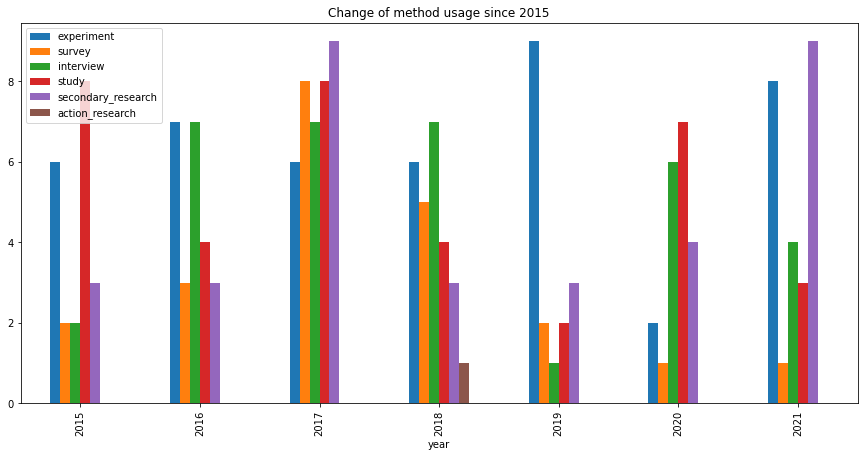

In [225]:
data.groupby(['year']).count().plot(kind='bar', figsize=(15,7), title='Change of method usage since {year}'.format(year=start_year))

Beschreibung

**Wie hoch ist der Anteil bei der Verwendung von surveys, case studies und action research im RE?** 

<AxesSubplot:ylabel='research methods'>

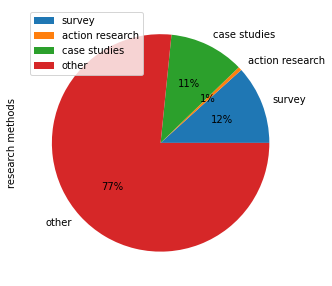

In [188]:
query = """
        SELECT ?year, ?surveys, ?action_research, ?case_studies
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?contribution orkgp:P56008 ?collection.
              ?paper orkgp:P29 ?year.
              OPTIONAL{?collection orkgp:P57036 ?surveys.}
              OPTIONAL{?collection orkgp:P57020 ?action_research.}
              OPTIONAL{?collection orkgp:P57040/rdfs:label ?case_studies.
                FILTER regex(?case_studies, "case study", "i")}
        }
        """ 
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
number_of_survey = data['surveys'].value_counts().sum()
number_of_action_research = data['action_research'].value_counts().sum()
number_of_case_studies = data['case_studies'].value_counts().sum()
all = number_of_action_research + number_of_case_studies + number_of_survey
method_data = pd.DataFrame({'research methods':[number_of_survey, number_of_action_research, number_of_case_studies, len(data) - all]}, index=['survey', 'action research', 'case studies', 'other'])
method_data.plot(kind='pie',  y='research methods', autopct='%1.0f%%', figsize=(5,5))

Dieses Diagramm stellt das Verhältnis von den Methoden case studies, surveys und action research im Vergleich zu den anderen verwendeten Methoden dar. 

**Wie hat sich die Nutzung dieser drei Methoden (survey, case studies und action research) in den vergangenen Jahren entwickelt?**

<AxesSubplot:xlabel='year'>

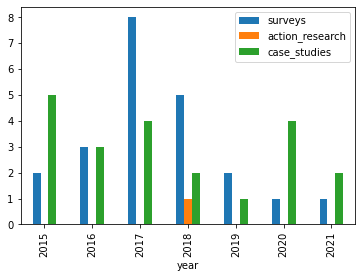

In [189]:
data.groupby('year').count().plot(kind='bar')

Das Diagramm stellt dar, wie sich die Nutzung der Methoden Umfragen, action research und case studies verändert im Zeitraum von 2015-20201 verändert haben. Für Umfragen ist erkennbar, dass es bis 2017 einen Anstieg bei der Verwendung dieser Methode gab. Ab 2018 ist die Tendenz bei der Verwenung sinkend. Action Research hingegen wurde nur einmal als Forschungsmethode gewählt, sodass hier eine Aussage über die Tendenz nicht möglich ist. 

**Welche statistischen Methoden werden in der Forschung im RE verwendet?**
Eine weitere Vision betrifft 

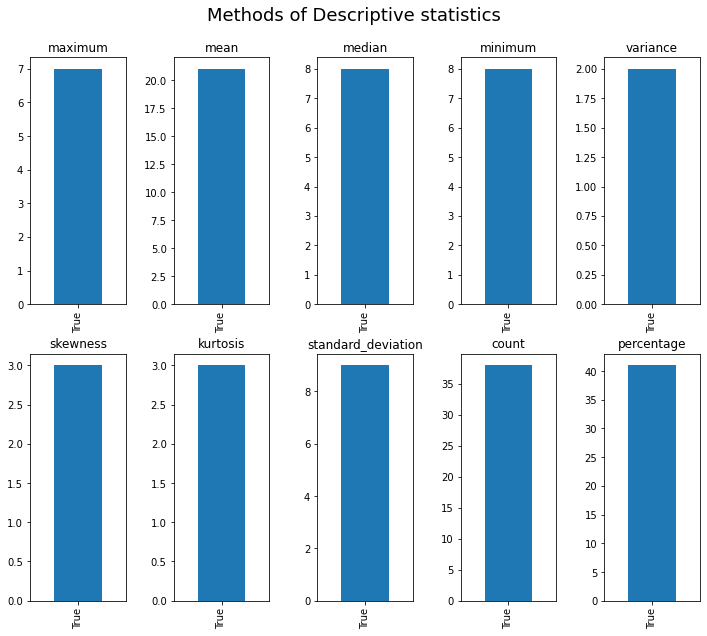

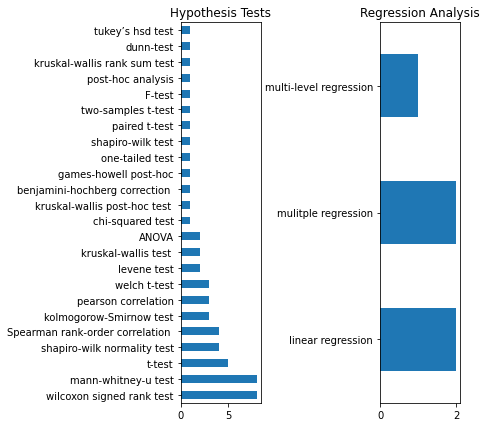

In [190]:
query = """
        SELECT ?year, ?maximum, ?mean, ?median, ?minimum, ?variance, ?skewness, ?kurtosis, ?standard_deviation, ?count, ?percentage, ?hypothesis_tests, ?regression
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper orkgp:P29 ?year.
              ?contribution orkgp:P15124 ?analysis.
              OPTIONAL{?analysis orkgp:P56048 ?descriptive.
                OPTIONAL{?descriptive orkgp:P57005 ?tendency.
                    ?tendency orkgp:P44108 ?maximum.
                    ?tendency orkgp:P47000 ?mean.
                    ?tendency orkgp:P57006 ?median.
                    ?tendency orkgp:P44107 ?minimum.
                    ?tendency orkgp:P57007 ?mode.}
                OPTIONAL{?descriptive orkgp:P57008 ?dispersion.
                    ?dispersion orkgp:P4013  ?range.
                    ?dispersion orkgp:P44087 ?standard_deviation.
                    ?dispersion orkgp:P57009 ?variance.
                    ?dispersion orkgp:P59063 ?skewness.
                    ?dispersion orkgp:P59064 ?kurtosis.}
                OPTIONAL{?descriptive orkgp:P56049 ?frequency.
                    ?frequency orkgp:P55023 ?count.
                    ?frequency orkgp:P56050 ?percentage.}
                }
              OPTIONAL{?analysis orkgp:P56043/orkgp:P56044/rdfs:label ?hypothesis_tests.}
              OPTIONAL{?analysis orkgp:P56043/orkgp:P56045/rdfs:label ?regression.}    
        }
        """ 
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
start_year = data.sort_values('year')['year'].iloc[0]
descriptive = data.iloc[:, 1:11]
#plot descriptive methods
plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace=0.5)
plt.suptitle("Methods of Descriptive statistics", fontsize=18, y=0.95)
for n, col in enumerate(descriptive.columns):
    ax = plt.subplot(2, 5, n + 1)
    if descriptive[descriptive[col] == True][col].sum() > 0:
        descriptive[descriptive[col] == True][col].value_counts().plot(kind='bar', ax=ax)
        #descriptive[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)

#plot inferential methods
fig, (ax, ax2) = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=1.5)
data['hypothesis_tests'].value_counts().plot(kind='barh', figsize=(5,7), title='Hypothesis Tests', ax=ax)
data['regression'].value_counts().plot(kind='barh', title='Regression Analysis', ax=ax2)
plt.show()


Wie hat sich die Nutzung dieser Methoden in den letzten Jahren geändert?

C:\Users\Felix\AppData\Local\Temp\ipykernel_13632\2726673099.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('year')['hypothesis_tests', 'regression'].count().plot(kind='bar', title='Usage of Inferential Statistic Methods since {year}'.format(year=start_year))


<AxesSubplot:title={'center':'Usage of Inferential Statistic Methods since 2015'}, xlabel='year'>

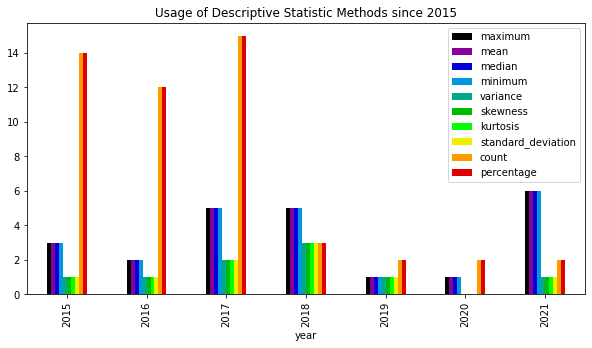

<Figure size 432x288 with 0 Axes>

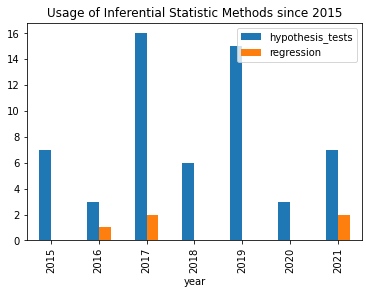

In [191]:
#descriptive methods over years
descriptive = data.iloc[:, :11]
colormap = plt.cm.nipy_spectral 
colors = [colormap(i) for i in np.linspace(0, 0.9, 10)]
descriptive.groupby('year').count().plot(kind='bar', figsize=(10,5), color=colors, title='Usage of Descriptive Statistic Methods since {year}'.format(year=start_year))

#inferential methods over years
plt.figure()
data.groupby('year')['hypothesis_tests', 'regression'].count().plot(kind='bar', title='Usage of Inferential Statistic Methods since {year}'.format(year=start_year))

Beschreibung

**Werden die Rohdaten, Materialien und Ergebnisse, die in einer Studie verwendet und erzielt wurden, veröffentlicht?**
In Zukunft sollen mehr Forschung das Ziel haben, diese Daten anderen Forscher zur Verfügung zu stellen und diese effizient zu nutzen. Daraus ergeben sich Folgende Fragen: "Werden die Rohdaten, Materialien und Ergebnisse, die in einer Studie verwendet und erzielt wurden, veröffenlicht?" und "Welche Daten werden veröffentlicht?". 

<Figure size 432x288 with 0 Axes>

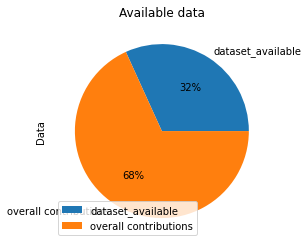

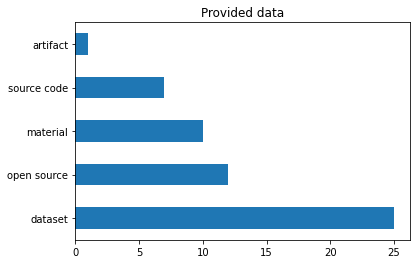

,contribution,data
0,http://orkg.org/orkg/resource/R194255,artifact
1,http://orkg.org/orkg/resource/R194126,source code
2,http://orkg.org/orkg/resource/R195534,source code
3,http://orkg.org/orkg/resource/R200099,source code
4,http://orkg.org/orkg/resource/R195180,source code
...,...,...
168,http://orkg.org/orkg/resource/R193922,NaN
169,http://orkg.org/orkg/resource/R193931,NaN
170,http://orkg.org/orkg/resource/R194055,NaN
171,http://orkg.org/orkg/resource/R194115,NaN


In [228]:
query = """
        SELECT ?contribution, ?data
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper rdfs:label ?title.
              OPTIONAL{?contribution orkgp:P56008/orkgp:DATA/orkgp:P17001/rdfs:label ?data.}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
available_data = data['data'].value_counts().sum()
test = pd.DataFrame({'Data':[available_data, len(data) - available_data]}, index=['dataset_available', 'overall contributions'])
plt.figure()
test.plot(kind='pie', y='Data', autopct='%1.0f%%', title="Available data") 
plt.figure()               
data['data'].value_counts().plot(kind='barh', title="Provided data")
plt.show()
data

Beschreibung

**Wird die Antwort auf eine Forschungsfrage explizit im Text gegeben oder ist diese im Text versteckt?**
Sjoberg et al. sagen, dass wichtige Ergebnisse einer Studie of durch akademische Sprache oder mathematischen notationen versteckt wird. In Zukunft soll der Fokus mehr darauf gerichtet sein, dass diese Ergebnisse klar Kommuniziert werden. Daraus ergibt die die Frage: "Wird die Antwort auf eine Forschungsfrage explizit im Text gegeben oder ist diese im Text versteckt?".

<AxesSubplot:ylabel='highlighted'>

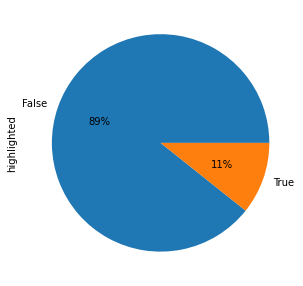

In [193]:
query = """
        SELECT ?contribution, ?highlighted, ?hidden
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P57004 ?research_question_answer.
                OPTIONAL{?research_question_answer orkgp:P55039 ?highlighted.
                         ?research_question_answer orkgp:P55038 ?hidden.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data['highlighted'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(5,5))

Anhand dieses Diagramms ist erkennbar, dass nur 11% der aktuell im ORKG beschriebenen Contributions im Bereich des RE eine Antwort auf eine Forschungsfrage explizit im Text geben.

**Wie hoch ist der Anteil von systematischen Studien(SLR, mapping study...)?**

<AxesSubplot:ylabel='methods'>

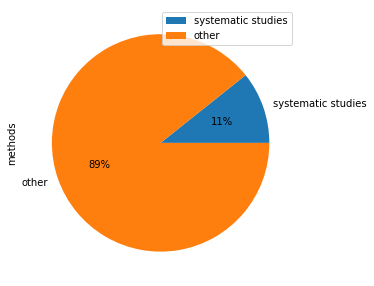

In [194]:
query = """
        SELECT ?contribution, ?secondary
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              OPTIONAL{?contribution orkgp:P56008/orkgp:P57021/rdfs:label ?secondary.
              FILTER regex(?secondary, "(literature|systematic)", "i")}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
number_systematic_studies = data['secondary'].value_counts().sum()
systematic_studies = pd.DataFrame({'methods':[number_systematic_studies, len(data) - number_systematic_studies]}, index=['systematic studies', 'other'])
systematic_studies.plot(kind='pie', y='methods', autopct='%1.0f%%', figsize=(5,5))

Beschreibung

Verwenden Forschungen mehr als eine Forschungsmethode?

<AxesSubplot:>

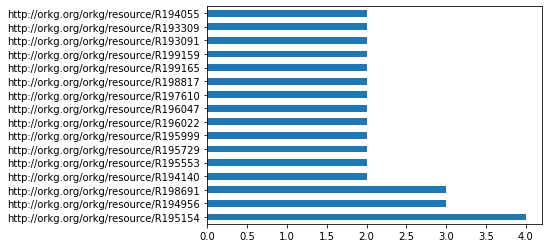

In [208]:
query = """
        SELECT ?contribution, ?collection
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P56008/rdfs:label ?collection.
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data = data[data['collection'] != 'collection']
combined = data[data.duplicated(['contribution'], keep=False)]
combined['contribution'].value_counts().plot(kind='barh')

Dieses Diagramm stellt 15 Paper dar, die mehr als eine Methode für die Sammlung von Daten verwendet haben.

Welche Methoden werden Kombiniert?

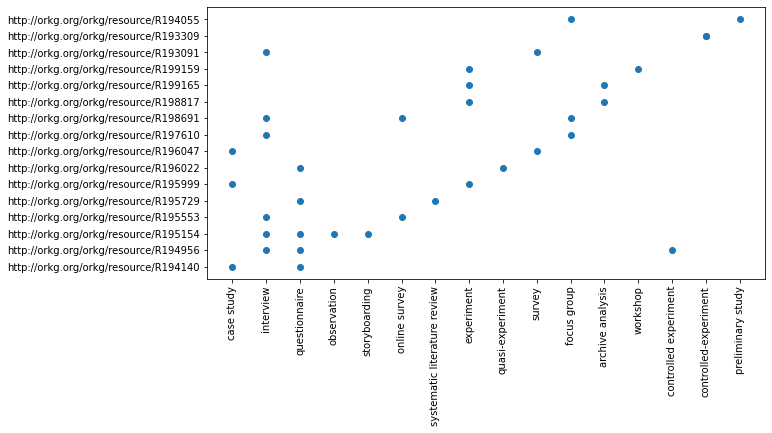

In [196]:
plt.figure(figsize=(10, 5))
plt.scatter(x=combined['collection'], y=combined['contribution'])
plt.xticks(rotation=90)
plt.show()

Beschreibung

**Welche Kombinationen aus data collection methods und analysis methods werden verwendet?**

Beschreibung

In [210]:
query = """
        SELECT ?experiment,  ?study, ?survey, ?secondary_research, ?interview, ?descriptive, ?inferential, ?coding, ?machine, ?error, ?reg, ?regularity, ?comparative, 
               ?sentiment, ?in_depth, ?behavioural, ?stakeholder, ?literature, ?artefact
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                OPTIONAL{?contribution orkgp:P56008/orkgp:P1007 ?experiment.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57040 ?study.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57036 ?survey.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57021 ?secondary_research.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57034 ?interview.}
                
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56048 ?descriptive.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043 ?inferential.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59061 ?coding.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P57016 ?machine.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P15099 ?error}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59057 ?regularity.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59058 ?comparative.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59059 ?triangulation.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59074 ?sentiment.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59094 ?in_depth.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59095 ?behavioural.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59110 ?stakeholder.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P59126 ?literature.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:60007 ?artefact.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)

<AxesSubplot:title={'center':'Analysis methods in combination with Experiment'}, ylabel='usage'>

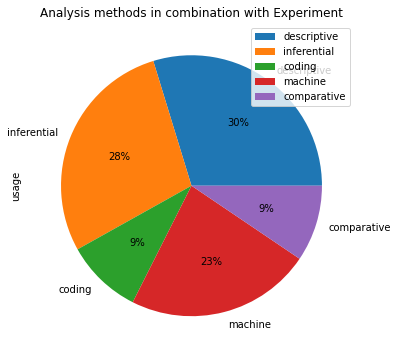

In [213]:
methods = []
amount = []
experiment_data = data[~data['experiment'].isnull()]
for col in range(5, len(experiment_data.columns)):
        if experiment_data[experiment_data.columns[col]].value_counts().sum() != 0:
                methods.append(experiment_data.columns[col])
                amount.append(experiment_data[experiment_data.columns[col]].value_counts().sum())
experiment_data = pd.DataFrame({'usage': amount}, index=methods)
experiment_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(6,6), title="Analysis methods in combination with Experiment")

<AxesSubplot:title={'center':'Analysis methods in combination with Studies'}, ylabel='usage'>

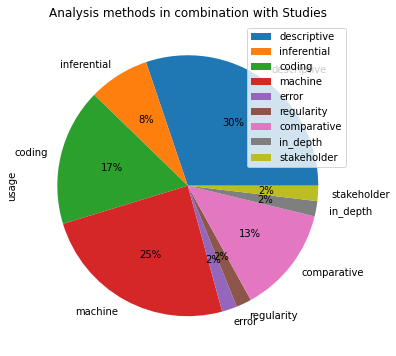

In [216]:
types = []
amount = []
study_data = data[~data['study'].isnull()]
for col in range(5, len(study_data.columns)):
        if study_data[study_data.columns[col]].value_counts().sum() != 0:
                types.append(study_data.columns[col])
                amount.append(study_data[study_data.columns[col]].value_counts().sum())
study_data = pd.DataFrame({'usage': amount}, index=types)
study_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(6,6), title="Analysis methods in combination with Studies")

<AxesSubplot:title={'center':'Analysis method in combination with Surveys'}, ylabel='usage'>

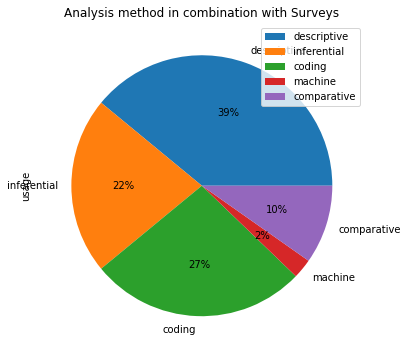

In [217]:
methods = []
amount = []
survey_data = data[~data['survey'].isnull()]
for col in range(5, len(survey_data.columns)):
        if survey_data[survey_data.columns[col]].value_counts().sum() != 0:
                methods.append(survey_data.columns[col])
                amount.append(survey_data[survey_data.columns[col]].value_counts().sum())
survey_data = pd.DataFrame({'usage': amount}, index=methods)
survey_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(6,6), title="Analysis method in combination with Surveys")

<AxesSubplot:title={'center':'Analysis method in combination with Secondary Research'}, ylabel='usage'>

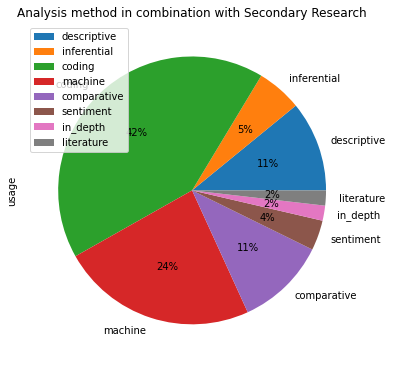

In [221]:
methods = []
amount = []
secondary_research_data = data[~data['secondary_research'].isnull()]
for col in range(5, len(secondary_research_data.columns)):
        if secondary_research_data[secondary_research_data.columns[col]].value_counts().sum() != 0:
                methods.append(secondary_research_data.columns[col])
                amount.append(secondary_research_data[secondary_research_data.columns[col]].value_counts().sum())
secondary_research_data = pd.DataFrame({'usage': amount}, index=methods)
secondary_research_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(6,7), title="Analysis method in combination with Secondary Research")

<AxesSubplot:title={'center':'Analysis method in combination with Interviews'}, ylabel='usage'>

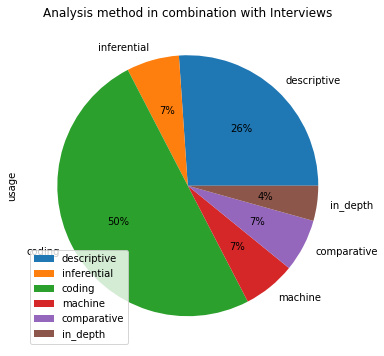

In [218]:
methods = []
amount = []
interview_data = data[~data['interview'].isnull()]
for col in range(5, len(interview_data.columns)):
        if interview_data[interview_data.columns[col]].value_counts().sum() != 0:
                methods.append(interview_data.columns[col])
                amount.append(interview_data[interview_data.columns[col]].value_counts().sum())
interview_data = pd.DataFrame({'usage': amount}, index=methods)
interview_data.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(6,6), title="Analysis method in combination with Interviews")